In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
df_test = pd.read_csv('/content/DailyDelhiClimateTest.csv')
df_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df = df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [4]:
len(df_test)

114

In [5]:
len(df_train)

1462

In [7]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [8]:
df_train.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


UNI-Variate Analysis

In [9]:
df_train = df_train.rename(columns={'date':'ds','meantemp':'y'})
df_train

,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [10]:
df_train['y_orig'] = df_train['y']
df_train

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,6.000000
...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,17.217391
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,15.238095
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,14.095238
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,15.052632


In [11]:
df_train['y'] = np.log(df_train['y'])
df_train

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000
...,...,...,...,...,...,...
1457,2016-12-28,2.845920,68.043478,3.547826,1015.565217,17.217391
1458,2016-12-29,2.723799,87.857143,6.000000,1016.904762,15.238095
1459,2016-12-30,2.645837,89.666667,6.266667,1017.904762,14.095238
1460,2016-12-31,2.711553,87.000000,7.325000,1016.100000,15.052632


In [12]:
model = Prophet()
model.fit(df_train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [13]:
future_data = model.make_future_dataframe(periods=113,freq = 'D')
forecast_data = model.predict(future_data)
forecast_data[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,2.395599,2.275969,2.532235
1,2013-01-02,2.401486,2.282015,2.527757
2,2013-01-03,2.401939,2.282240,2.521296
3,2013-01-04,2.404375,2.289166,2.526439
4,2013-01-05,2.404467,2.279109,2.534703
...,...,...,...,...
1570,2017-04-20,3.553277,3.433436,3.676893
1571,2017-04-21,3.557053,3.433348,3.685532
1572,2017-04-22,3.557335,3.432913,3.670964
1573,2017-04-23,3.556707,3.427677,3.677309


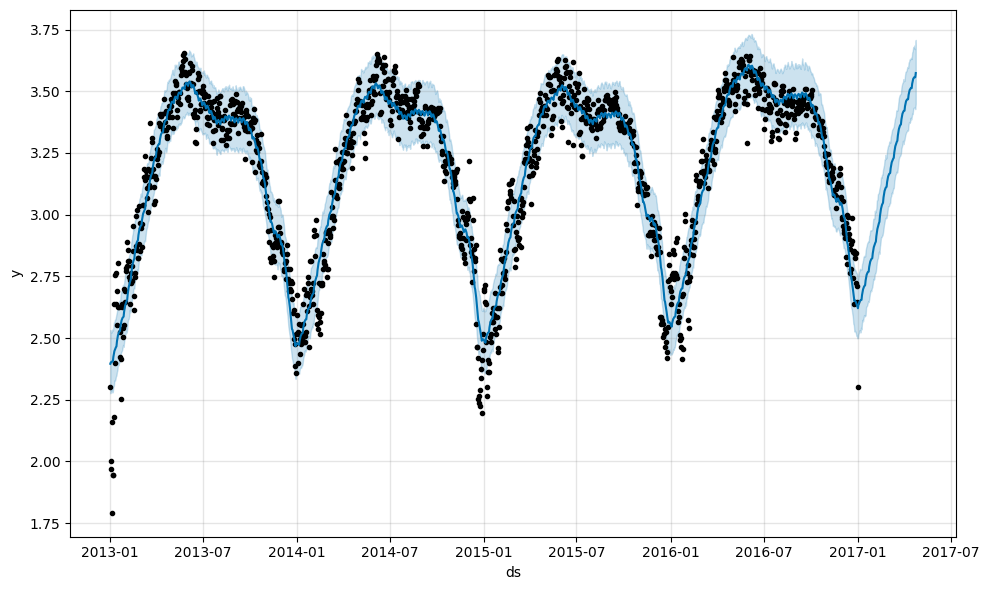

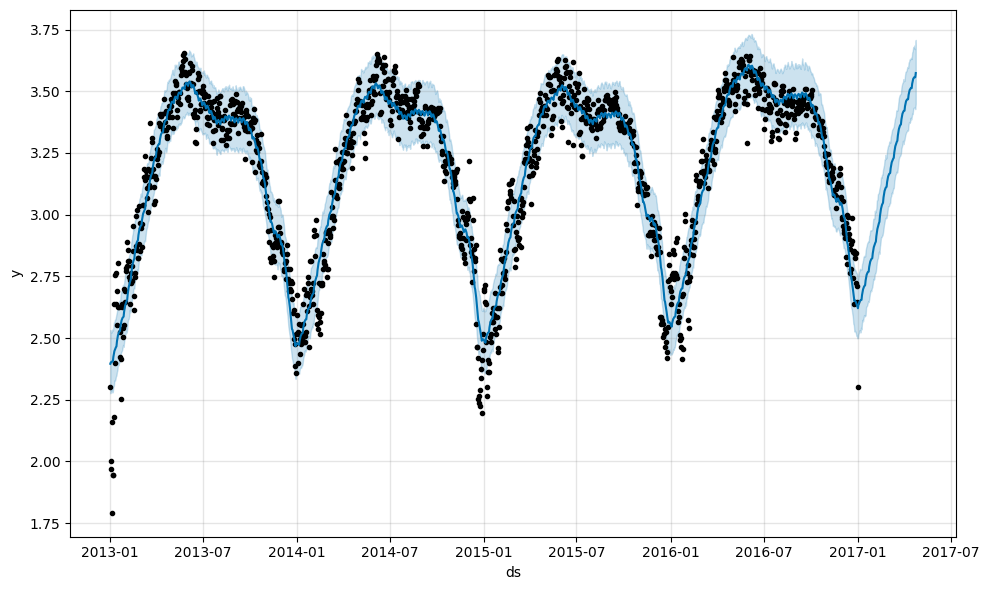

In [14]:
model.plot(forecast_data)

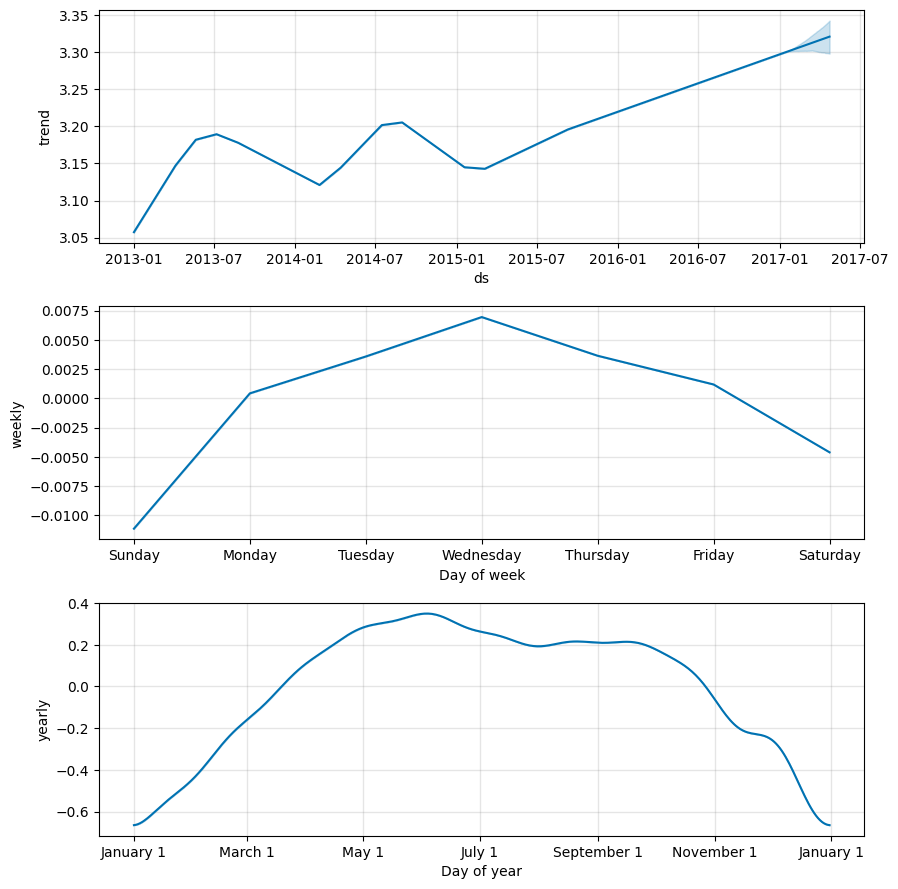

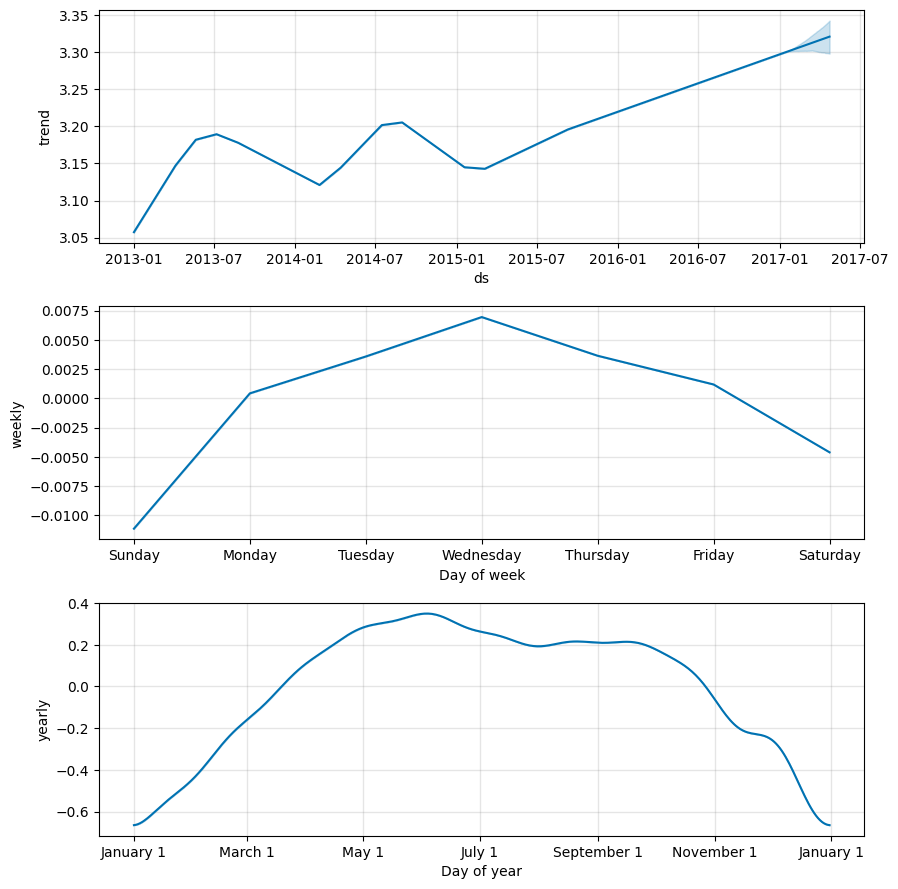

In [16]:
model.plot_components(forecast_data)

In [17]:
forecast_data_orig = forecast_data.copy()
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])
forecast_data_orig

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.057319,9.737352,12.581598,3.057319,3.057319,-0.661720,-0.661720,-0.661720,0.003575,0.003575,0.003575,-0.665296,-0.665296,-0.665296,0.0,0.0,0.0,10.974767
1,2013-01-02,3.058276,9.796400,12.525380,3.058276,3.058276,-0.656790,-0.656790,-0.656790,0.006948,0.006948,0.006948,-0.663738,-0.663738,-0.663738,0.0,0.0,0.0,11.039568
2,2013-01-03,3.059234,9.798601,12.444718,3.059234,3.059234,-0.657294,-0.657294,-0.657294,0.003639,0.003639,0.003639,-0.660933,-0.660933,-0.660933,0.0,0.0,0.0,11.044576
3,2013-01-04,3.060191,9.866703,12.508886,3.060191,3.060191,-0.655816,-0.655816,-0.655816,0.001183,0.001183,0.001183,-0.656999,-0.656999,-0.656999,0.0,0.0,0.0,11.071506
4,2013-01-05,3.061148,9.767971,12.612688,3.061148,3.061148,-0.656681,-0.656681,-0.656681,-0.004618,-0.004618,-0.004618,-0.652063,-0.652063,-0.652063,0.0,0.0,0.0,11.072523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1570,2017-04-20,3.320158,30.982924,39.523404,3.298716,3.340222,0.233120,0.233120,0.233120,0.003639,0.003639,0.003639,0.229481,0.229481,0.229481,0.0,0.0,0.0,34.927600
1571,2017-04-21,3.320369,30.980188,39.866338,3.298588,3.340789,0.236684,0.236684,0.236684,0.001183,0.001183,0.001183,0.235501,0.235501,0.235501,0.0,0.0,0.0,35.059714
1572,2017-04-22,3.320580,30.966723,39.289767,3.298420,3.341411,0.236755,0.236755,0.236755,-0.004618,-0.004618,-0.004618,0.241373,0.241373,0.241373,0.0,0.0,0.0,35.069622
1573,2017-04-23,3.320792,30.804995,39.539838,3.298293,3.342048,0.235915,0.235915,0.235915,-0.011149,-0.011149,-0.011149,0.247064,0.247064,0.247064,0.0,0.0,0.0,35.047604


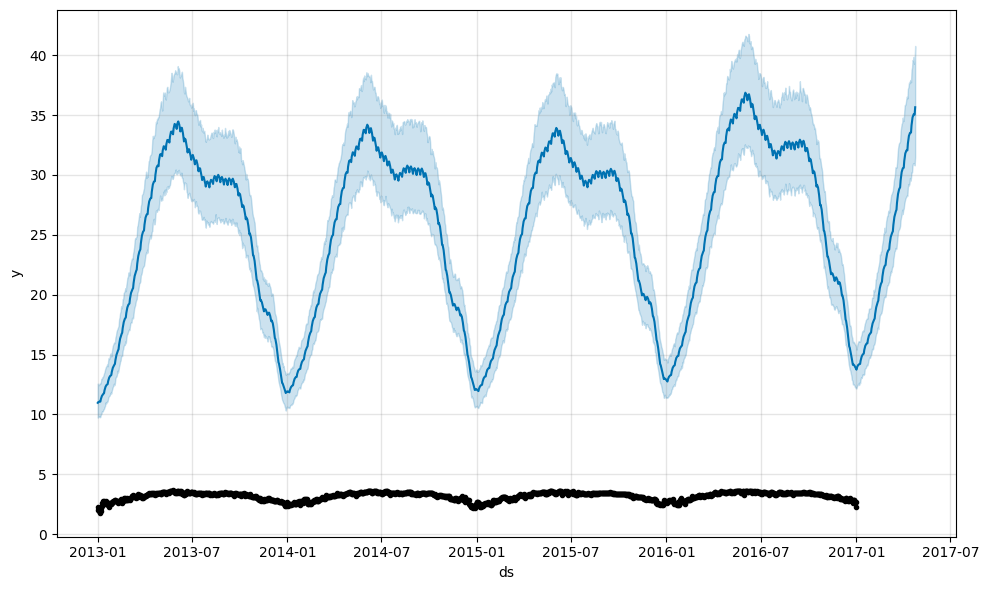

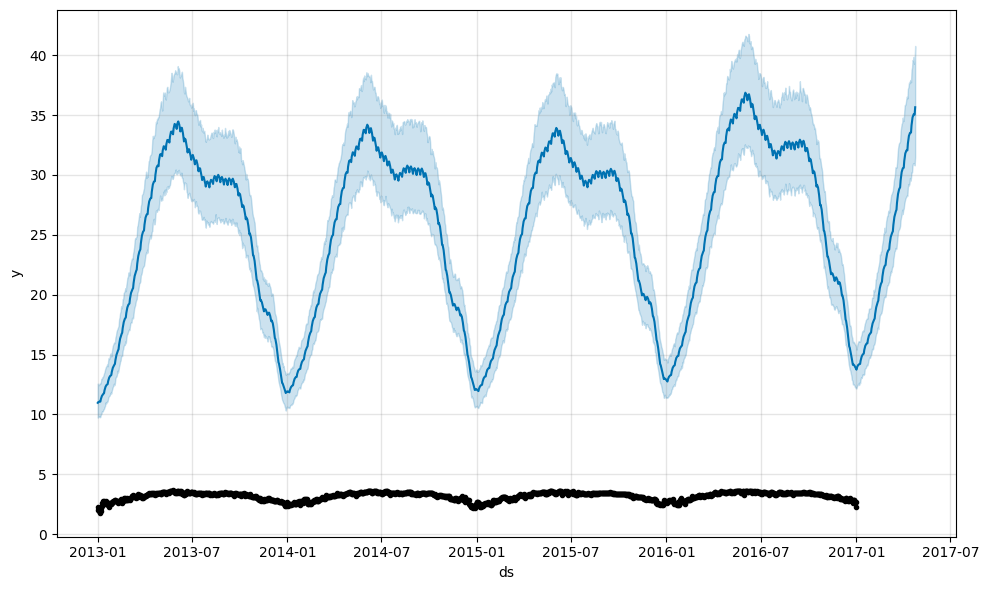

In [18]:
model.plot(forecast_data_orig)

In [20]:
df_train['y_log'] = df_train['y']
df_train['y'] = df_train['y_orig']
df_train

,ds,y,humidity,wind_speed,meanpressure,y_orig,y_log
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667,10.000000,2.302585
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000,7.400000,2.001480
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.166667,1.969441
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667,8.666667,2.159484
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000,6.000000,1.791759
...,...,...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217,17.217391,2.845920
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762,15.238095,2.723799
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762,14.095238,2.645837
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000,15.052632,2.711553


In [22]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
py.init_notebook_mode(connected=True)
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'

In [23]:
df_test.head(5)

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [24]:
final_df.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.057319,9.737352,12.581598,3.057319,3.057319,-0.661720,-0.661720,-0.661720,0.003575,0.003575,0.003575,-0.665296,-0.665296,-0.665296,0.0,0.0,0.0,10.974767
1,2013-01-02,3.058276,9.796400,12.525380,3.058276,3.058276,-0.656790,-0.656790,-0.656790,0.006948,0.006948,0.006948,-0.663738,-0.663738,-0.663738,0.0,0.0,0.0,11.039568
2,2013-01-03,3.059234,9.798601,12.444718,3.059234,3.059234,-0.657294,-0.657294,-0.657294,0.003639,0.003639,0.003639,-0.660933,-0.660933,-0.660933,0.0,0.0,0.0,11.044576
3,2013-01-04,3.060191,9.866703,12.508886,3.060191,3.060191,-0.655816,-0.655816,-0.655816,0.001183,0.001183,0.001183,-0.656999,-0.656999,-0.656999,0.0,0.0,0.0,11.071506
4,2013-01-05,3.061148,9.767971,12.612688,3.061148,3.061148,-0.656681,-0.656681,-0.656681,-0.004618,-0.004618,-0.004618,-0.652063,-0.652063,-0.652063,0.0,0.0,0.0,11.072523


In [26]:
rows = final_df['yhat'].tail(113)
rows = rows.reset_index()

In [27]:
rows.pop('index')

,index
0,1462
1,1463
2,1464
3,1465
4,1466
...,...
108,1570
109,1571
110,1572
111,1573


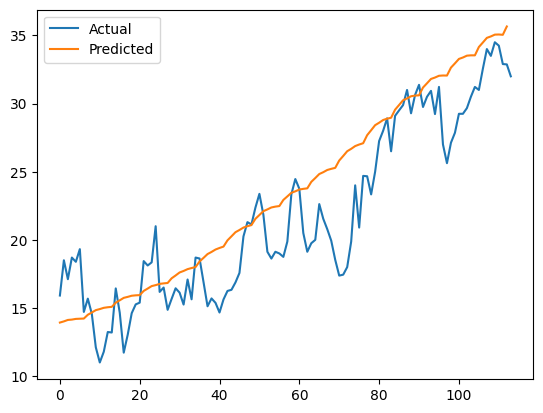

In [28]:
import matplotlib.pyplot as plt
plt.plot(df_test['meantemp'], label='Actual')
plt.plot(rows, label='Predicted')
plt.legend()
plt.show()

Multivariate Forecasting

In [42]:
df_test = pd.read_csv('/content/DailyDelhiClimateTest.csv')
df_train = pd.read_csv('/content/DailyDelhiClimateTrain.csv')
df = df_train
df_train

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [43]:
df_train = df_train.rename(columns={'meantemp': 'y', 'date':'ds'})
df_train['y_orig'] = df_train['y']
df_train['y'] = np.log(df_train['y'])

In [44]:
df_train.head(5)

,ds,y,humidity,wind_speed,meanpressure,y_orig
0,2013-01-01,2.302585,84.500000,0.000000,1015.666667,10.000000
1,2013-01-02,2.001480,92.000000,2.980000,1017.800000,7.400000
2,2013-01-03,1.969441,87.000000,4.633333,1018.666667,7.166667
3,2013-01-04,2.159484,71.333333,1.233333,1017.166667,8.666667
4,2013-01-05,1.791759,86.833333,3.700000,1016.500000,6.000000


In [48]:
model_new = Prophet()
model_new.add_regressor('wind_speed')
model_new.add_regressor('meanpressure')
model_new.add_regressor('humidity')
model_new.fit(df_train)


future_data.tail(5)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
1570,2017-04-20
1571,2017-04-21
1572,2017-04-22
1573,2017-04-23
1574,2017-04-24


In [49]:
future_data.head(5)

,ds
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


In [51]:
# Prepare df_test to be concatenated with df_train for future_data
df_test_processed = df_test.rename(columns={'date': 'ds'})
df_test_processed['ds'] = pd.to_datetime(df_test_processed['ds'])

# Combine the 'ds' and regressor columns from df_train and df_test
# This creates the complete future_data DataFrame with regressors for prediction
future_data_with_regressors = pd.concat([
    df_train[['ds', 'humidity', 'wind_speed', 'meanpressure']],
    df_test_processed[['ds', 'humidity', 'wind_speed', 'meanpressure']]
], ignore_index=True)

# Ensure 'ds' column is datetime type
future_data_with_regressors['ds'] = pd.to_datetime(future_data_with_regressors['ds'])

forecast_data = model_new.predict(future_data_with_regressors)
forecast_data[['ds','yhat','yhat_lower','yhat_upper']].head(5)

,ds,yhat,yhat_lower,yhat_upper
0,2013-01-01,2.349644,2.244221,2.454407
1,2013-01-02,2.315259,2.206408,2.424798
2,2013-01-03,2.337141,2.227519,2.441355
3,2013-01-04,2.424721,2.311502,2.533668
4,2013-01-05,2.356330,2.243748,2.463979


In [52]:
forecast_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,humidity,humidity_lower,humidity_upper,meanpressure,meanpressure_lower,meanpressure_upper,weekly,weekly_lower,weekly_upper,wind_speed,wind_speed_lower,wind_speed_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,3.036554,2.244221,2.454407,3.036554,3.036554,-0.686910,-0.686910,-0.686910,-0.102740,-0.102740,-0.102740,-0.112379,-0.112379,-0.112379,-0.000036,-0.000036,-0.000036,0.002676,0.002676,0.002676,0.009676,0.009676,0.009676,-0.586846,-0.586846,-0.586846,0.0,0.0,0.0,2.349644
1,2013-01-02,3.037747,2.206408,2.424798,3.037747,3.037747,-0.722488,-0.722488,-0.722488,-0.142516,-0.142516,-0.142516,-0.147900,-0.147900,-0.147900,-0.000053,-0.000053,-0.000053,0.003661,0.003661,0.003661,0.005437,0.005437,0.005437,-0.583632,-0.583632,-0.583632,0.0,0.0,0.0,2.315259
2,2013-01-03,3.038940,2.227519,2.441355,3.038940,3.038940,-0.701799,-0.701799,-0.701799,-0.121194,-0.121194,-0.121194,-0.124219,-0.124219,-0.124219,-0.000060,-0.000060,-0.000060,-0.001456,-0.001456,-0.001456,0.003085,0.003085,0.003085,-0.579149,-0.579149,-0.579149,0.0,0.0,0.0,2.337141
3,2013-01-04,3.040133,2.311502,2.533668,3.040133,3.040133,-0.615413,-0.615413,-0.615413,-0.042147,-0.042147,-0.042147,-0.050021,-0.050021,-0.050021,-0.000048,-0.000048,-0.000048,0.000279,0.000279,0.000279,0.007921,0.007921,0.007921,-0.573544,-0.573544,-0.573544,0.0,0.0,0.0,2.424721
4,2013-01-05,3.041326,2.243748,2.463979,3.041326,3.041326,-0.684996,-0.684996,-0.684996,-0.119060,-0.119060,-0.119060,-0.123430,-0.123430,-0.123430,-0.000043,-0.000043,-0.000043,0.001042,0.001042,0.001042,0.004413,0.004413,0.004413,-0.566978,-0.566978,-0.566978,0.0,0.0,0.0,2.356330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1571,2017-04-20,3.308587,3.470344,3.683827,3.291312,3.324466,0.265747,0.265747,0.265747,0.159439,0.159439,0.159439,0.157577,0.157577,0.157577,0.000099,0.000099,0.000099,-0.001456,-0.001456,-0.001456,0.001763,0.001763,0.001763,0.107763,0.107763,0.107763,0.0,0.0,0.0,3.574334
1572,2017-04-21,3.308787,3.415330,3.635280,3.291230,3.324965,0.213967,0.213967,0.213967,0.101197,0.101197,0.101197,0.101336,0.101336,0.101336,0.000089,0.000089,0.000089,0.000279,0.000279,0.000279,-0.000228,-0.000228,-0.000228,0.112491,0.112491,0.112491,0.0,0.0,0.0,3.522754
1573,2017-04-22,3.308986,3.417534,3.638777,3.291148,3.325254,0.209685,0.209685,0.209685,0.091219,0.091219,0.091219,0.094114,0.094114,0.094114,0.000075,0.000075,0.000075,0.001042,0.001042,0.001042,-0.002970,-0.002970,-0.002970,0.117425,0.117425,0.117425,0.0,0.0,0.0,3.518671
1574,2017-04-23,3.309185,3.473091,3.688464,3.291066,3.325727,0.269097,0.269097,0.269097,0.153153,0.153153,0.153153,0.157577,0.157577,0.157577,0.000071,0.000071,0.000071,-0.006569,-0.006569,-0.006569,-0.004495,-0.004495,-0.004495,0.122513,0.122513,0.122513,0.0,0.0,0.0,3.578282


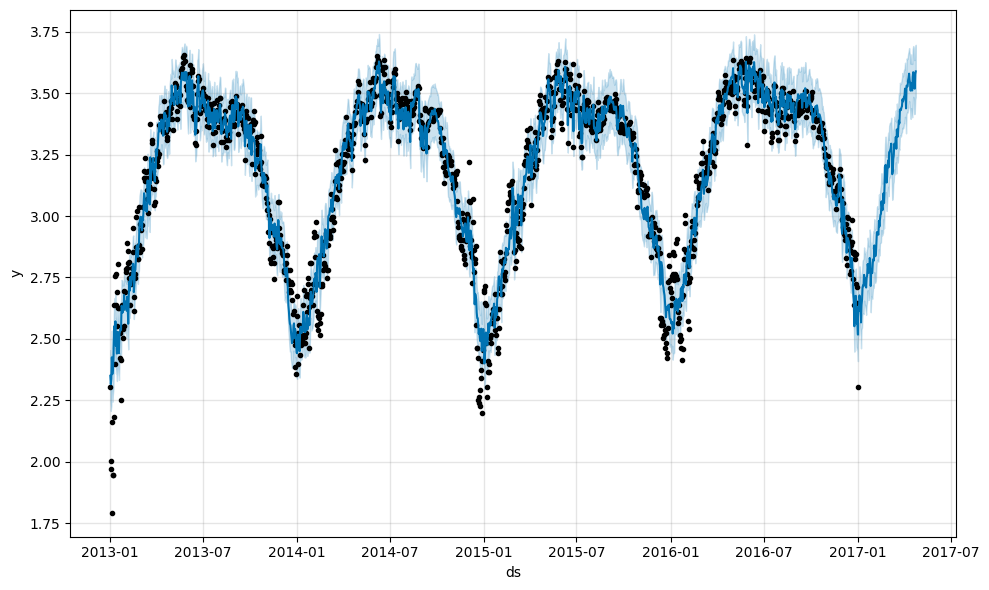

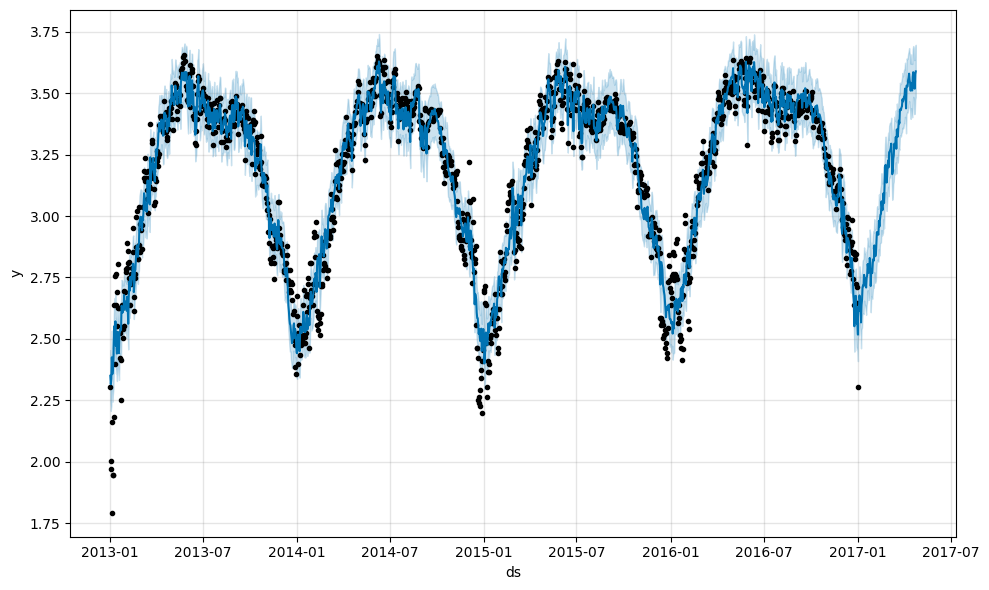

In [53]:
model_new.plot(forecast_data)

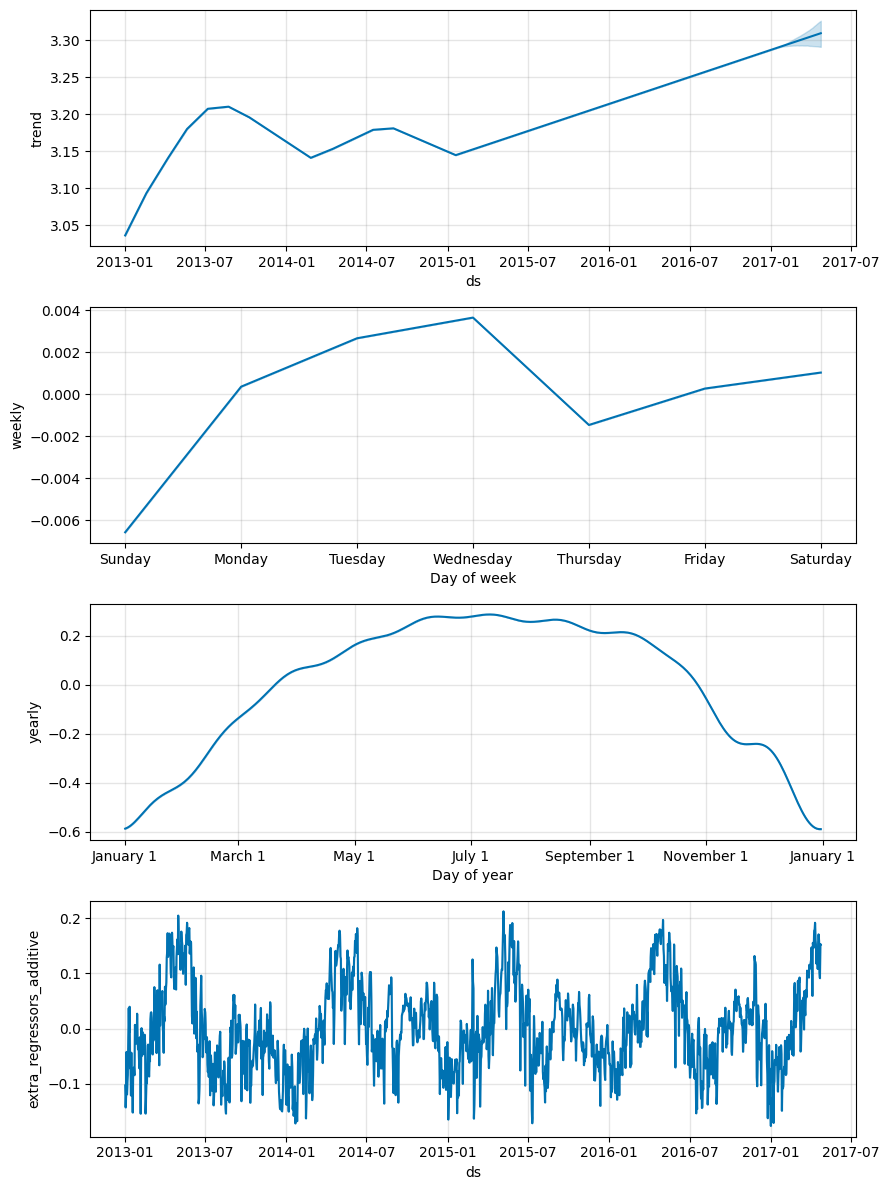

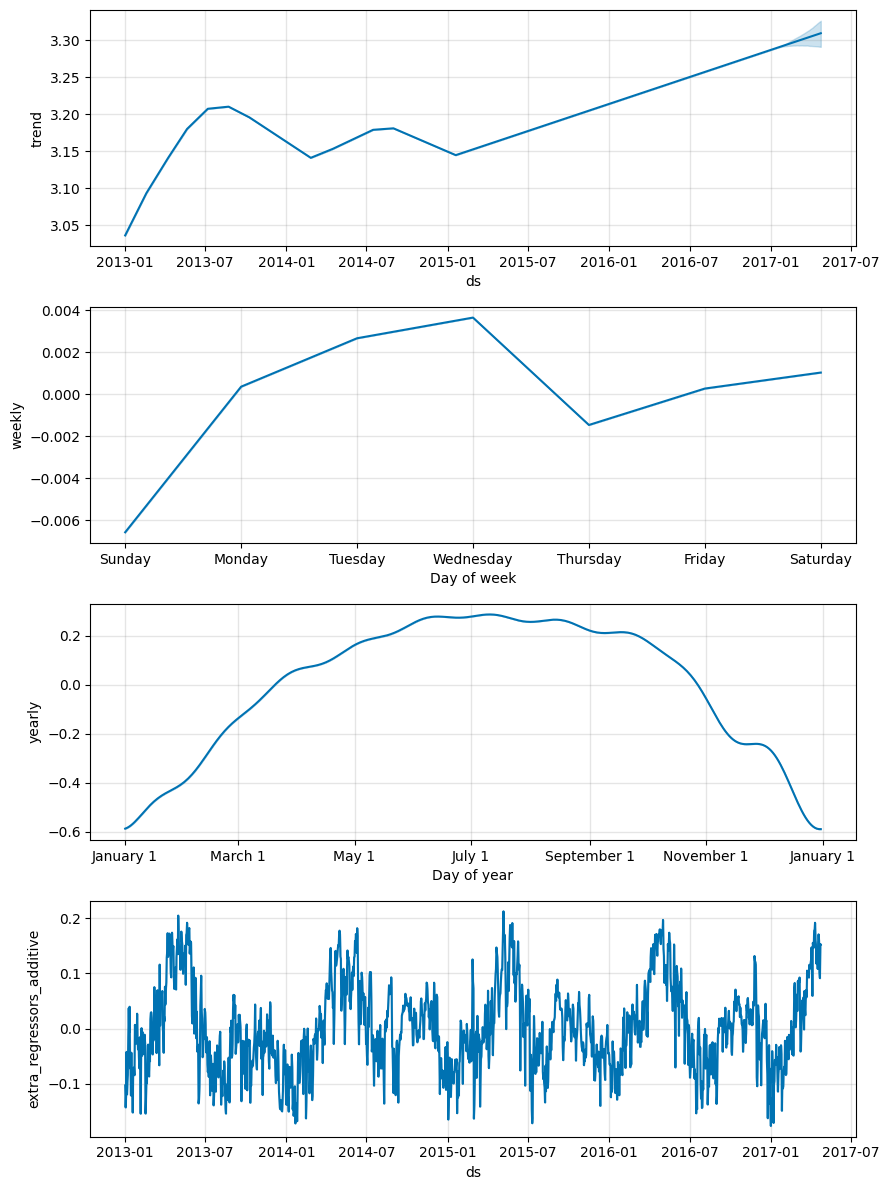

In [54]:
model_new.plot_components(forecast_data)

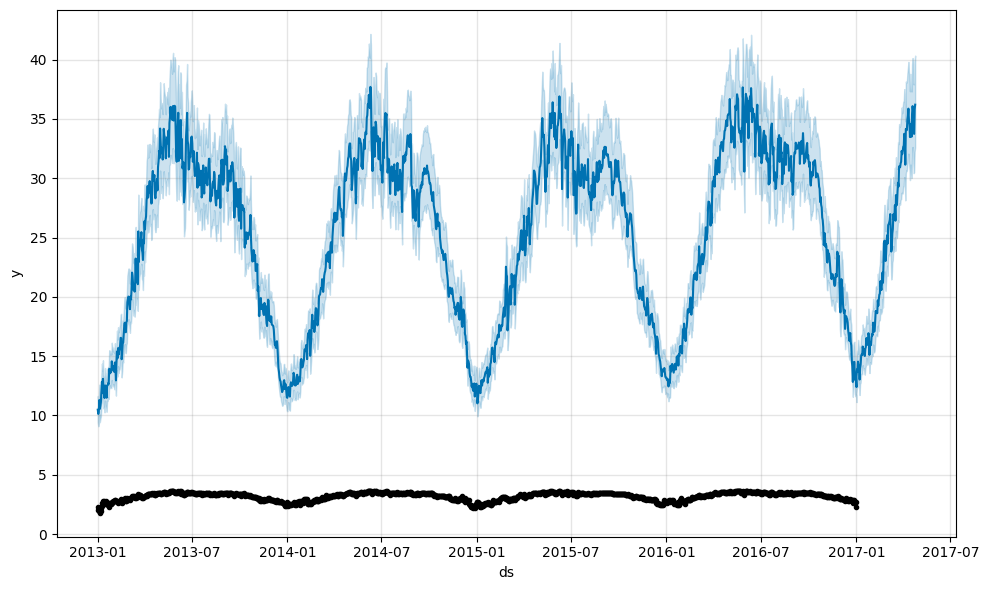

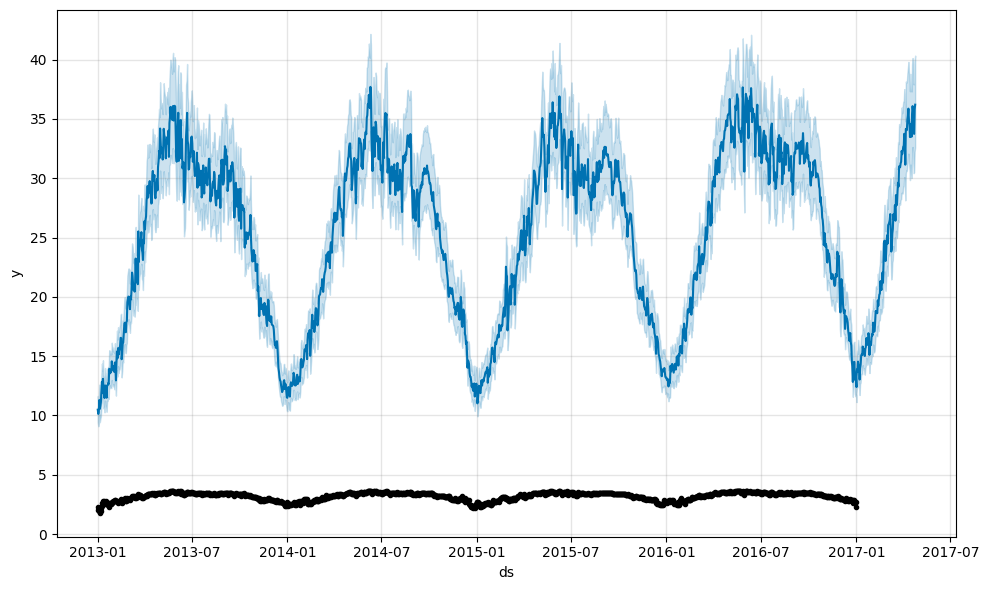

In [55]:
forecast_data_orig = forecast_data # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

model_new.plot(forecast_data_orig)

In [56]:
df_train['y_log']=df_train['y'] #copy the log-transformed data to another column
df_train['y']=df_train['y_orig']

In [57]:
final_df = pd.DataFrame(forecast_data_orig)
import plotly.graph_objs as go
import plotly.offline as py
#Plot predicted and actual line graph with X=dates, Y=Outbound
actual_chart = go.Scatter(y=df_train["y_orig"], name= 'Actual')
predict_chart = go.Scatter(y=final_df["yhat"], name= 'Predicted')
predict_chart_upper = go.Scatter(y=final_df["yhat_upper"], name= 'Predicted Upper')
predict_chart_lower = go.Scatter(y=final_df["yhat_lower"], name= 'Predicted Lower')
py.plot([actual_chart, predict_chart, predict_chart_upper, predict_chart_lower])

'temp-plot.html'